1. Understand the data variables properly

In [4]:
import pandas as pd

# Load datasets
store_details = pd.read_excel(r"C:\Users\RAJDEEP_CHAKRABORTY\Desktop\XYZ\IVY\PYTHON\PYTHON SESSION\CAPSTONE PROJECT\Store_Details.xlsx")
business_data = pd.read_excel(r"C:\Users\RAJDEEP_CHAKRABORTY\Desktop\XYZ\IVY\PYTHON\PYTHON SESSION\CAPSTONE PROJECT\Business_Data.xlsx")
sales_history = pd.read_excel(r"C:\Users\RAJDEEP_CHAKRABORTY\Desktop\XYZ\IVY\PYTHON\PYTHON SESSION\CAPSTONE PROJECT\Sales_History.xlsx")

# Function to summarize dataset
def dataset_summary(df, name):
    print(f"\n--- {name} ---")
    print("Shape:", df.shape)
    print("\nColumn Info:")
    print(df.info())
    print("\nSample Rows:")
    print(df.head(3))
    print("\nMissing Values:")
    print(df.isnull().sum())

# Summaries
dataset_summary(store_details, "Store_Details")
dataset_summary(business_data, "Business_Data")
dataset_summary(sales_history, "Sales_History")


C:\Users\RAJDEEP_CHAKRABORTY\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():



--- Store_Details ---
Shape: (45, 6)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Store      45 non-null     int64 
 1   Type       45 non-null     object
 2   Address    45 non-null     object
 3   Area_Code  45 non-null     int64 
 4   Location   45 non-null     object
 5   Size       45 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.2+ KB
None

Sample Rows:
   Store                    Type  \
0      1  E-Commerce Fulfillment   
1      2  E-Commerce Fulfillment   
2      3                    Food   

                                           Address  Area_Code  \
0        1893 W Malvern Ave, Fullerton, California      92835   
1           1000 Commerce Ave, Atwater, California      95301   
2  15555 East 14th Street, San Leandro, California      94578   

                         Location    Size  
0  Applegate Ra

In [7]:
import numpy as np

# -------------------------------
# 1. Store_Details Cleaning
# -------------------------------
print("Store_Details info:\n", store_details.info())
store_details = store_details.drop_duplicates()

# Fill missing categorical values with mode
for col in store_details.select_dtypes(include="object").columns:
    store_details[col] = store_details[col].fillna(store_details[col].mode()[0])

# Fill missing numeric values with median
for col in store_details.select_dtypes(include=np.number).columns:
    store_details[col] = store_details[col].fillna(store_details[col].median())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Store      45 non-null     int64 
 1   Type       45 non-null     object
 2   Address    45 non-null     object
 3   Area_Code  45 non-null     int64 
 4   Location   45 non-null     object
 5   Size       45 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.2+ KB
Store_Details info:
 None


In [8]:
# -------------------------------
# 2. Business_Data Cleaning
# -------------------------------
print("Business_Data info:\n", business_data.info())
business_data = business_data.drop_duplicates()

# Convert Date column to datetime
business_data["Date"] = pd.to_datetime(business_data["Date"], errors="coerce")

# Extract useful time features
business_data["Year"] = business_data["Date"].dt.year
business_data["Month"] = business_data["Date"].dt.month
business_data["Weekday"] = business_data["Date"].dt.day_name()

# Handle missing MarkDown values (can be NA)
markdown_cols = [col for col in business_data.columns if "MarkDown" in col]
for col in markdown_cols:
    business_data[col] = business_data[col].fillna(0)  # treating missing promotions as 0

# Fill other numeric missing values with median
for col in business_data.select_dtypes(include=np.number).columns:
    business_data[col] = business_data[col].fillna(business_data[col].median())

# Outlier treatment using IQR
for col in ["Temperature", "Fuel_Price", "CPI", "Unemployment_Rate"]:
    Q1 = business_data[col].quantile(0.25)
    Q3 = business_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    business_data[col] = np.where(business_data[col] > upper, upper,
                           np.where(business_data[col] < lower, lower, business_data[col]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Store              8190 non-null   int64         
 1   Date               8190 non-null   datetime64[ns]
 2   Temperature        8190 non-null   float64       
 3   Fuel_Price         8190 non-null   float64       
 4   MarkDown1          4032 non-null   float64       
 5   MarkDown2          2921 non-null   float64       
 6   MarkDown3          3613 non-null   float64       
 7   MarkDown4          3464 non-null   float64       
 8   MarkDown5          4050 non-null   float64       
 9   CPI                7605 non-null   float64       
 10  Unemployment_Rate  7605 non-null   float64       
 11  Holiday            8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
Business_Data info:
 None


In [9]:
# -------------------------------
# 3. Sales_History Cleaning
# -------------------------------
print("Sales_History info:\n", sales_history.info())
sales_history = sales_history.drop_duplicates()

# Convert Date to datetime
sales_history["Date"] = pd.to_datetime(sales_history["Date"], errors="coerce")

# Extract features
sales_history["Year"] = sales_history["Date"].dt.year
sales_history["Month"] = sales_history["Date"].dt.month
sales_history["Weekday"] = sales_history["Date"].dt.day_name()

# Fill missing holiday values (if any) with False
if "Holiday" in sales_history.columns:
    sales_history["Holiday"] = sales_history["Holiday"].fillna(False)

# Outlier treatment for Total_Sales
Q1 = sales_history["Total_Sales"].quantile(0.25)
Q3 = sales_history["Total_Sales"].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
sales_history["Total_Sales"] = np.where(sales_history["Total_Sales"] > upper, upper,
                                np.where(sales_history["Total_Sales"] < lower, lower, sales_history["Total_Sales"]))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Store        421570 non-null  int64         
 1   Department   421570 non-null  int64         
 2   Date         421570 non-null  datetime64[ns]
 3   Total_Sales  421570 non-null  float64       
 4   Holiday      421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
Sales_History info:
 None


In [10]:
# -------------------------------
# Final Check
# -------------------------------
print("Store_Details cleaned shape:", store_details.shape)
print("Business_Data cleaned shape:", business_data.shape)
print("Sales_History cleaned shape:", sales_history.shape)

Store_Details cleaned shape: (45, 6)
Business_Data cleaned shape: (8190, 15)
Sales_History cleaned shape: (421570, 8)


EXPLORATORY DATA ANALYSIS (EDA)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# ----------------------
# 1. Basic Information
# ----------------------
print("Store_Details Info:")
print(store_details.info())
print(store_details.describe(include='all'))

print("\nBusiness_Data Info:")
print(business_data.info())
print(business_data.describe(include='all'))

print("\nSales_History Info:")
print(sales_history.info())
print(sales_history.describe(include='all'))


Store_Details Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Store      45 non-null     int64 
 1   Type       45 non-null     object
 2   Address    45 non-null     object
 3   Area_Code  45 non-null     int64 
 4   Location   45 non-null     object
 5   Size       45 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.2+ KB
None
            Store                    Type  \
count   45.000000                      45   
unique        NaN                       3   
top           NaN  E-Commerce Fulfillment   
freq          NaN                      22   
mean    23.000000                     NaN   
std     13.133926                     NaN   
min      1.000000                     NaN   
25%     12.000000                     NaN   
50%     23.000000                     NaN   
75%     34.000000                     NaN   
max     45.00000

In [13]:
# Missing values check
print("\nMissing Values:")
print("Store_Details:\n", store_details.isnull().sum())
print("Business_Data:\n", business_data.isnull().sum())
print("Sales_History:\n", sales_history.isnull().sum())


Missing Values:
Store_Details:
 Store        0
Type         0
Address      0
Area_Code    0
Location     0
Size         0
dtype: int64
Business_Data:
 Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI                  0
Unemployment_Rate    0
Holiday              0
Year                 0
Month                0
Weekday              0
dtype: int64
Sales_History:
 Store          0
Department     0
Date           0
Total_Sales    0
Holiday        0
Year           0
Month          0
Weekday        0
dtype: int64


In [14]:
# ----------------------
# 2. Data Exploration
# ----------------------

# Unique stores and departments
print("No. of Stores:", sales_history['Store'].nunique())
print("No. of Departments:", sales_history['Department'].nunique())

# Convert date columns
business_data['Date'] = pd.to_datetime(business_data['Date'])
sales_history['Date'] = pd.to_datetime(sales_history['Date'])

# Merge datasets for better EDA
merged = sales_history.merge(business_data, on=["Store","Date","Holiday"], how="left")
merged = merged.merge(store_details, on="Store", how="left")


No. of Stores: 45
No. of Departments: 81


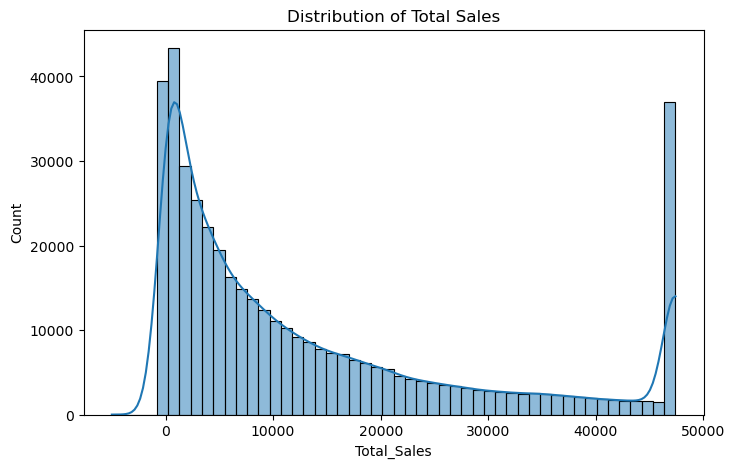

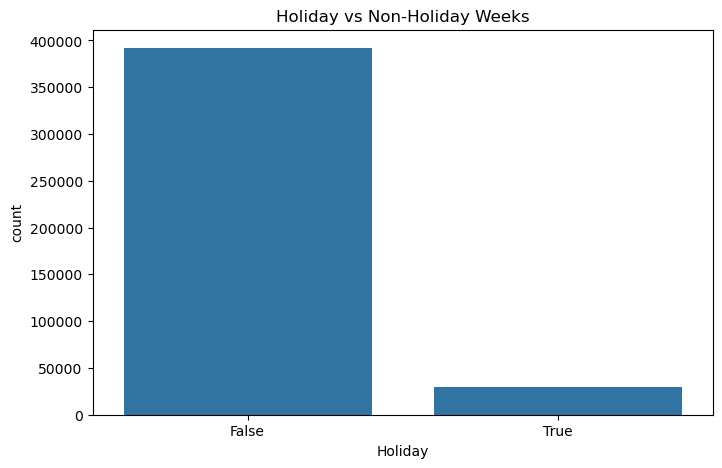

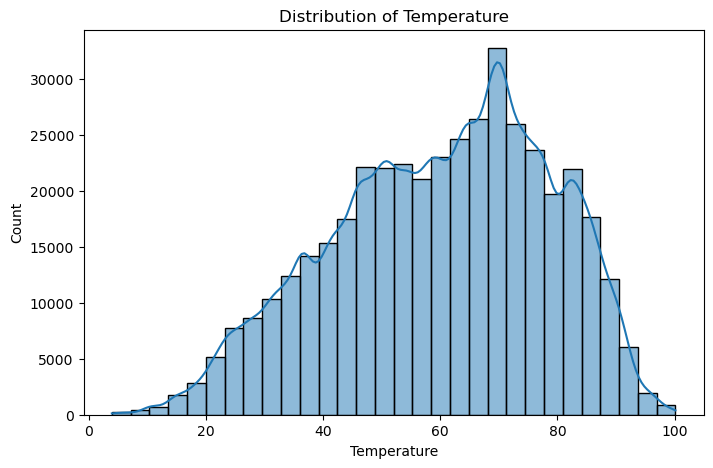

In [15]:
# ----------------------
# 3. Univariate Analysis
# ----------------------
plt.figure(figsize=(8,5))
sns.histplot(merged['Total_Sales'], bins=50, kde=True)
plt.title("Distribution of Total Sales")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="Holiday", data=merged)
plt.title("Holiday vs Non-Holiday Weeks")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(merged['Temperature'], bins=30, kde=True)
plt.title("Distribution of Temperature")
plt.show()

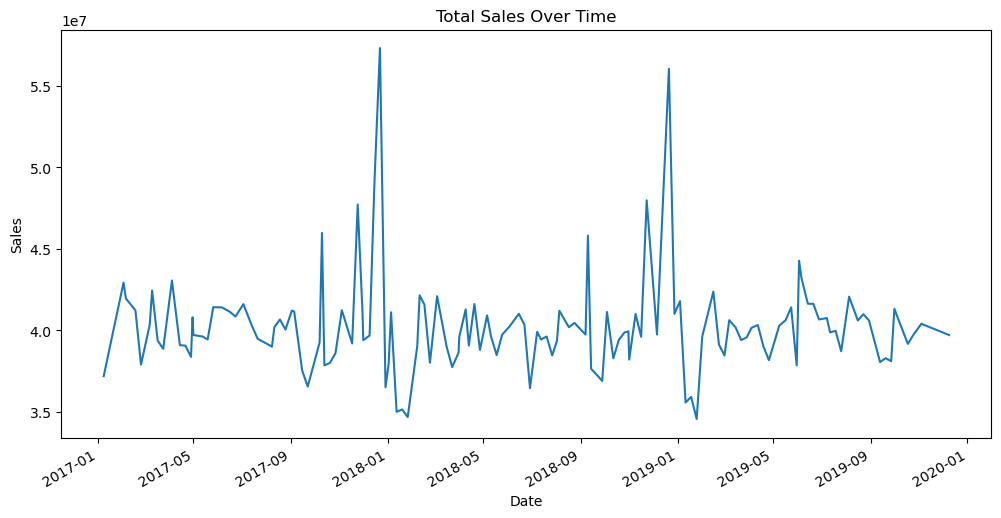

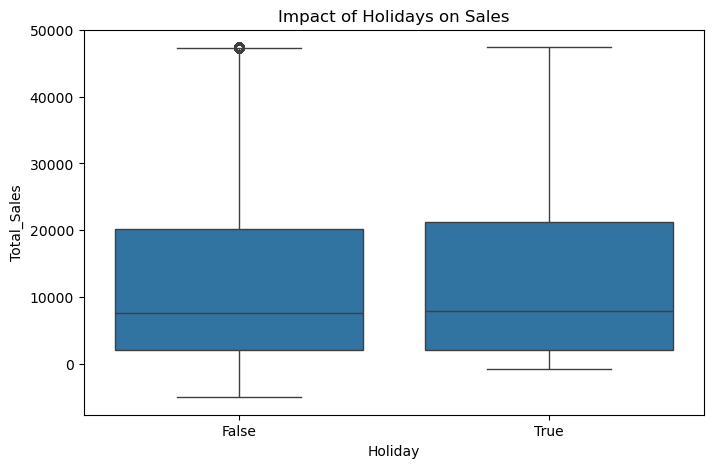

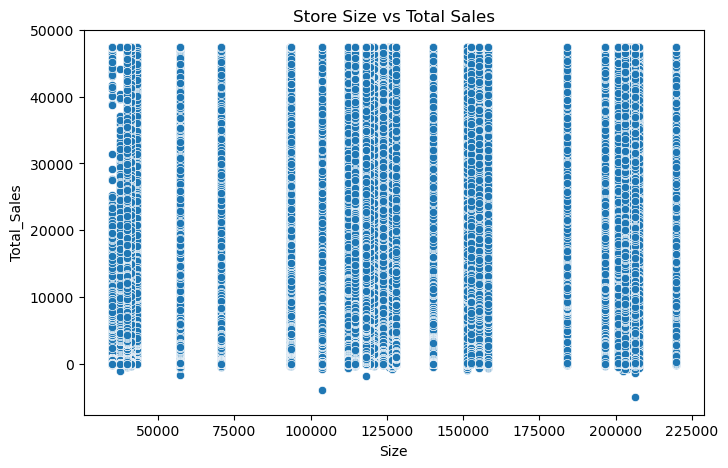

In [16]:
# ----------------------
# 4. Bivariate Analysis
# ----------------------

# Sales over time
plt.figure(figsize=(12,6))
merged.groupby("Date")['Total_Sales'].sum().plot()
plt.title("Total Sales Over Time")
plt.ylabel("Sales")
plt.show()

# Holiday impact
plt.figure(figsize=(8,5))
sns.boxplot(x="Holiday", y="Total_Sales", data=merged)
plt.title("Impact of Holidays on Sales")
plt.show()

# Store size vs sales
plt.figure(figsize=(8,5))
sns.scatterplot(x="Size", y="Total_Sales", data=merged)
plt.title("Store Size vs Total Sales")
plt.show()


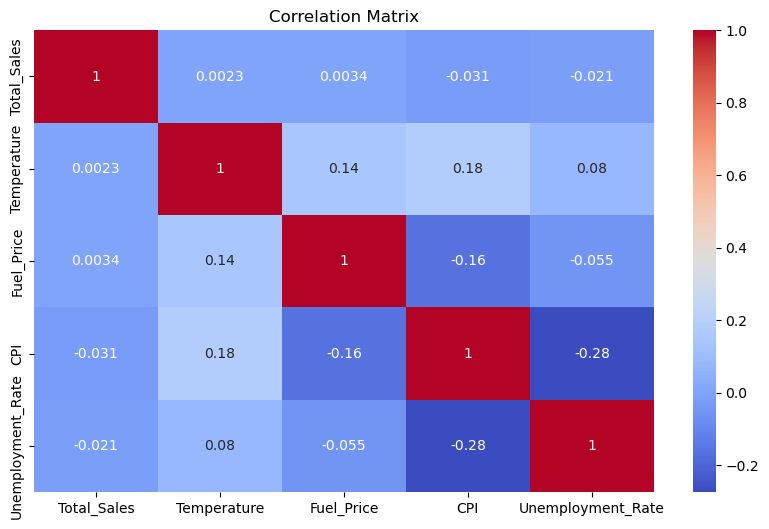

In [17]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(merged[['Total_Sales','Temperature','Fuel_Price','CPI','Unemployment_Rate']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# ----------------------
# 5. Assumptions / Notes
# ----------------------
"""
Assumptions:
1. Holiday weeks significantly influence sales → should be given higher weight.
2. Store size may correlate with sales volume.
3. Economic indicators (CPI, Fuel Price, Unemployment) might indirectly affect sales.
4. Missing markdown values are assumed as no promotions.
5. Outliers (e.g., extremely high sales) could be holiday-driven → should not be blindly removed.

Next Step:
- Perform detailed feature engineering (lags, moving averages, holiday flags).
- Run hypothesis tests to confirm relationships.
"""

Uni-variate and Bi-variate Analysis

In [18]:
# Merge sales with business_data on Store & Date for dependent-independent relation
data = pd.merge(sales_history, business_data, on=["Store", "Date", "Holiday"], how="left")

# Merge with store details if needed
data = pd.merge(data, store_details, on="Store", how="left")

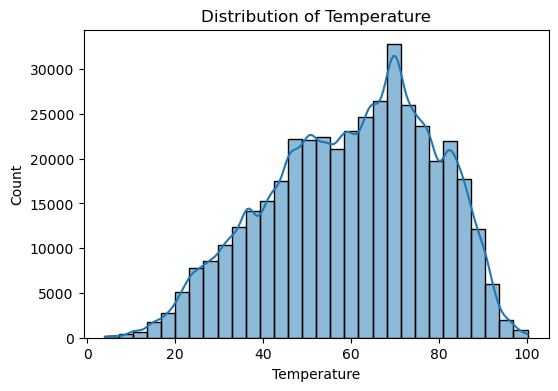

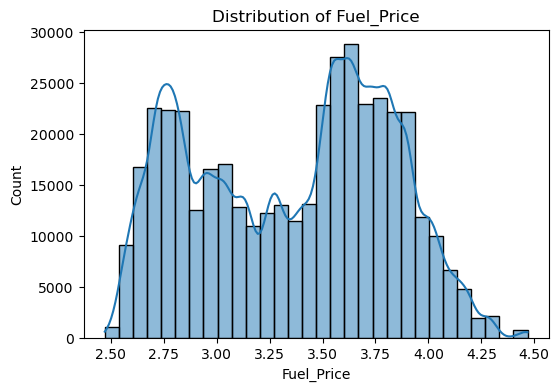

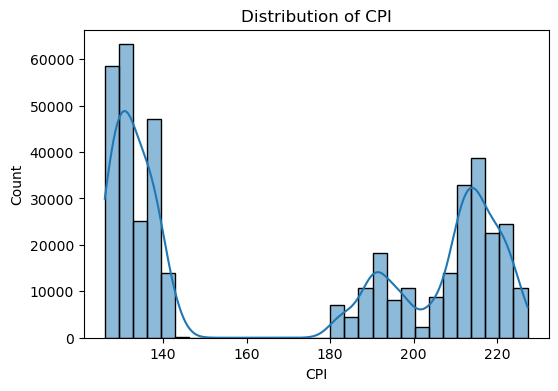

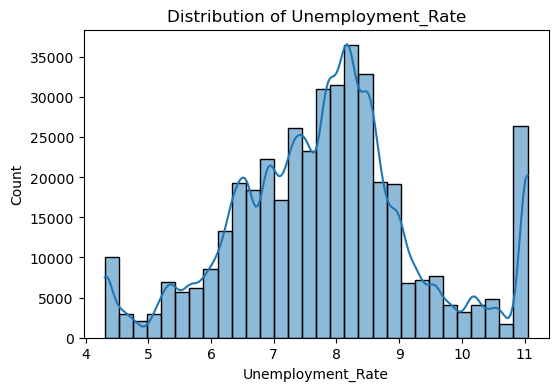

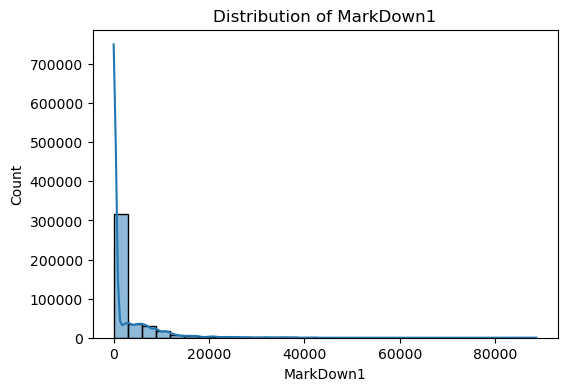

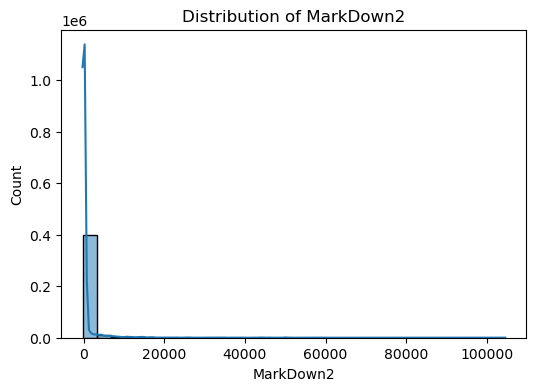

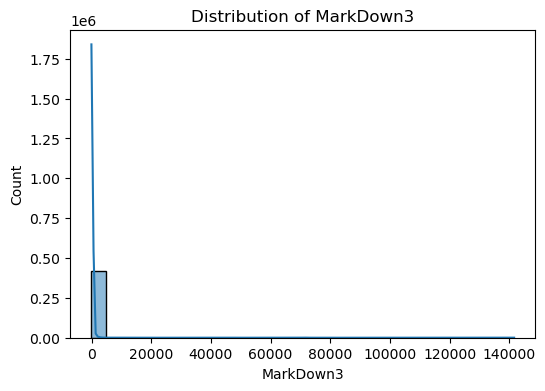

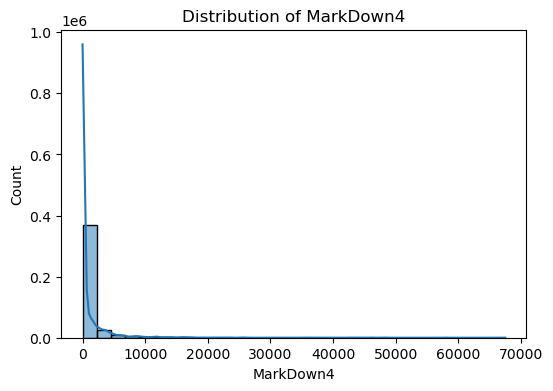

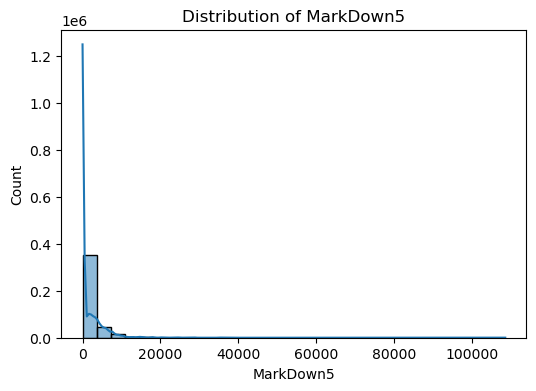

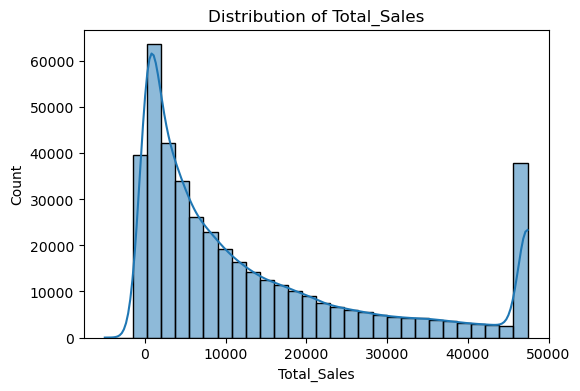

KeyError: 'Store Type'

<Figure size 600x400 with 0 Axes>

In [19]:
# ------------------- UNIVARIATE ANALYSIS -------------------

# Distribution plots for numeric variables
num_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment_Rate", "MarkDown1", "MarkDown2", 
            "MarkDown3", "MarkDown4", "MarkDown5", "Total_Sales"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Countplot for categorical variables (Store Type, Holiday)
cat_cols = ["Store Type", "Holiday"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=data[col])
    plt.title(f"Count of {col}")
    plt.show()


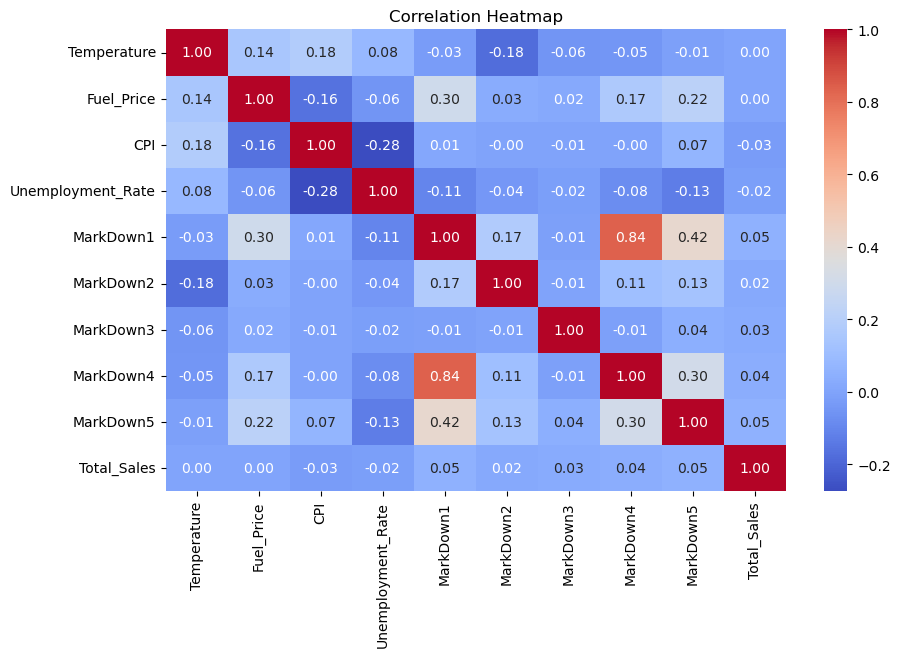

In [20]:
# ------------------- BIVARIATE ANALYSIS -------------------

# Correlation heatmap (numeric features vs sales)
plt.figure(figsize=(10,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


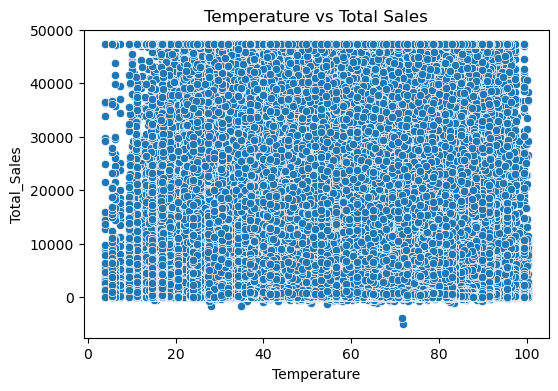

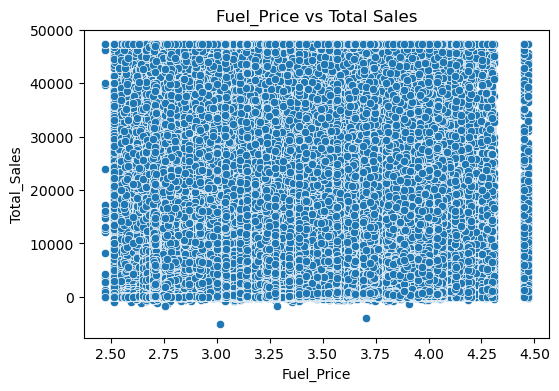

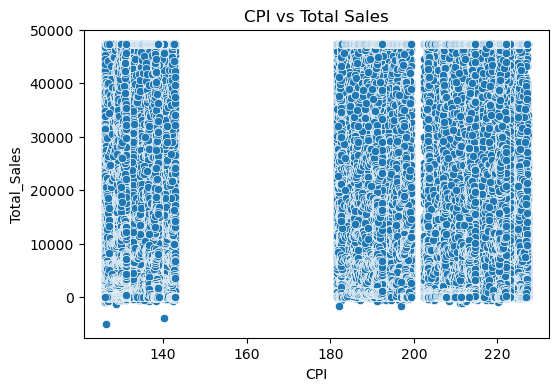

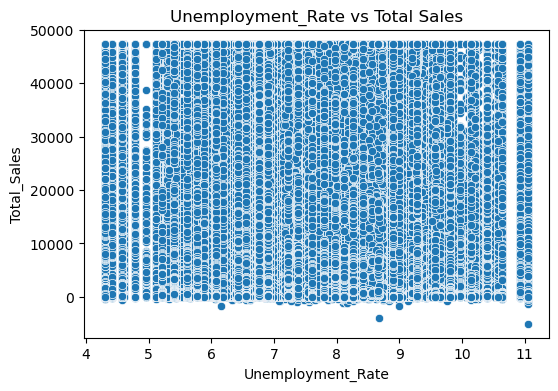

In [21]:
# Scatterplots: Each independent variable vs Total Sales
for col in ["Temperature", "Fuel_Price", "CPI", "Unemployment_Rate"]:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data[col], y=data["Total_Sales"])
    plt.title(f"{col} vs Total Sales")
    plt.show()

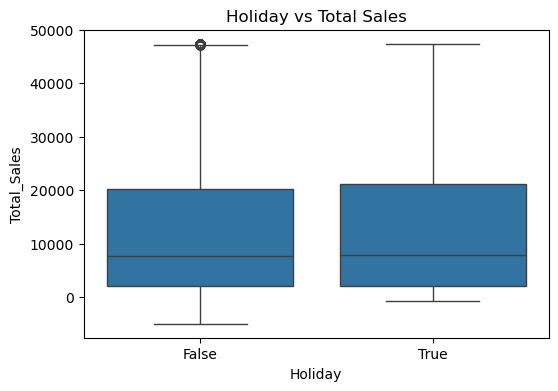

In [22]:
# Boxplot: Holiday vs Sales
plt.figure(figsize=(6,4))
sns.boxplot(x="Holiday", y="Total_Sales", data=data)
plt.title("Holiday vs Total Sales")
plt.show()


Feature Engineering

In [26]:
# Convert Date columns to datetime
business_data['Date'] = pd.to_datetime(business_data['Date'])
sales_history['Date'] = pd.to_datetime(sales_history['Date'])

# Merge Business data with Sales data
df = pd.merge(sales_history, business_data, on=["Store", "Date", "Holiday"], how="left")
df = pd.merge(df, store_details, on="Store", how="left")

In [27]:
# Time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [28]:
# Lag features (previous week's sales for same department)
df['Lag_1Week_Sales'] = df.groupby(['Store', 'Department'])['Total_Sales'].shift(1)
df['Lag_2Week_Sales'] = df.groupby(['Store', 'Department'])['Total_Sales'].shift(2)


In [29]:
# Rolling average sales
df['Rolling_4Week_Sales'] = df.groupby(['Store', 'Department'])['Total_Sales'].transform(lambda x: x.rolling(4).mean())
df['Rolling_12Week_Sales'] = df.groupby(['Store', 'Department'])['Total_Sales'].transform(lambda x: x.rolling(12).mean())


In [30]:
# Aggregated store-level sales
df['Store_Weekly_Sales'] = df.groupby(['Store','Date'])['Total_Sales'].transform('sum')
df['Dept_Weekly_Share'] = df['Total_Sales'] / df['Store_Weekly_Sales']

In [31]:
# Holiday-based features
df['IsHoliday'] = df['Holiday'].astype(int)

In [32]:
# Interaction features
df['Sales_per_Size'] = df['Total_Sales'] / df['Size']
df['Fuel_Sales_Ratio'] = df['Total_Sales'] / (df['Fuel_Price'] + 1e-5)

In [33]:
# CPI & Unemployment change
df['CPI_Change'] = df.groupby('Store')['CPI'].diff()
df['Unemployment_Change'] = df.groupby('Store')['Unemployment_Rate'].diff()

In [34]:
# Summary check
print(df.head(10))

   Store  Department       Date  Total_Sales  Holiday  Year_x  Month_x  \
0      1           1 2017-04-30  24924.50000    False    2017        4   
1      1           1 2017-11-30  46039.49000     True    2017       11   
2      1           1 2017-02-17  41595.55000    False    2017        2   
3      1           1 2017-02-24  19403.54000    False    2017        2   
4      1           1 2017-05-01  21827.90000    False    2017        5   
5      1           1 2017-12-01  21043.39000    False    2017       12   
6      1           1 2017-03-17  22136.64000    False    2017        3   
7      1           1 2017-03-24  26229.21000    False    2017        3   
8      1           1 2017-02-02  47395.15625    False    2017        2   
9      1           1 2017-09-02  42960.91000    False    2017        9   

  Weekday_x  Temperature  Fuel_Price  ...  Lag_2Week_Sales  \
0    Sunday        42.31       2.572  ...              NaN   
1  Thursday        38.51       2.548  ...              NaN   

Hypothesis Testing

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [36]:
# Quick summary of data
print("Store_Details:", store_details.shape)
print("Business_Data:", business_data.shape)
print("Sales_History:", sales_history.shape)

print("\nSales History Summary:\n", sales_history.describe())

Store_Details: (45, 6)
Business_Data: (8190, 15)
Sales_History: (421570, 8)

Sales History Summary:
                Store     Department                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2018-06-17 05:35:51.733756672   
min         1.000000       1.000000            2017-01-08 00:00:00   
25%        11.000000      18.000000            2017-10-10 00:00:00   
50%        22.000000      37.000000            2018-06-15 00:00:00   
75%        33.000000      74.000000            2019-03-01 00:00:00   
max        45.000000      99.000000            2019-12-09 00:00:00   
std        12.785297      30.492054                            NaN   

         Total_Sales           Year          Month  
count  421570.000000  421570.000000  421570.000000  
mean    13649.405016    2017.968591       6.436646  
min     -4988.940000    2017.000000       1.000000  
25%      2079.650000    2017.000000       4.000000  
50%

In [37]:
# Group sales by Holiday
holiday_sales = sales_history[sales_history['Holiday'] == True]['Total_Sales']
nonholiday_sales = sales_history[sales_history['Holiday'] == False]['Total_Sales']

In [41]:
# Perform t-test
t_stat, p_val = stats.ttest_ind(holiday_sales, nonholiday_sales, equal_var=False)

print("\nHypothesis Testing Results:")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ Reject Null Hypothesis: Sales differ significantly between holiday and non-holiday weeks.")
else:
    print("❌ Fail to Reject Null Hypothesis: No significant difference in sales.")


Hypothesis Testing Results:
T-statistic: 4.1814236658314
P-value: 2.904104848878854e-05
✅ Reject Null Hypothesis: Sales differ significantly between holiday and non-holiday weeks.


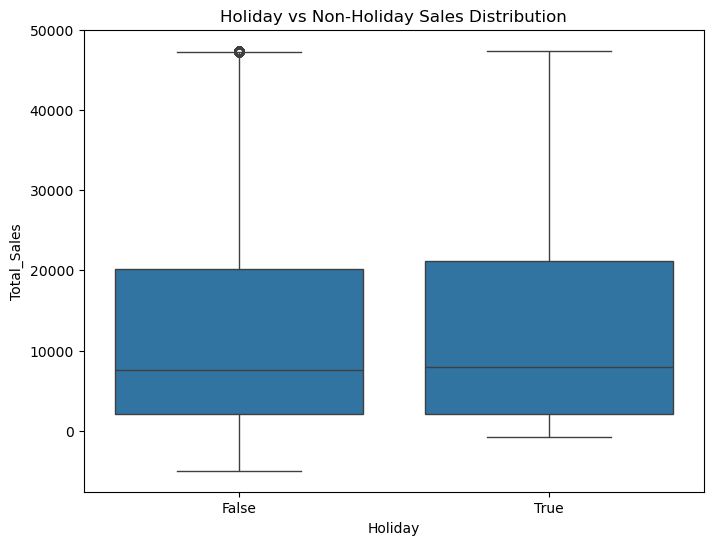

In [42]:
# Visualization
plt.figure(figsize=(8,6))
sns.boxplot(x="Holiday", y="Total_Sales", data=sales_history)
plt.title("Holiday vs Non-Holiday Sales Distribution")
plt.show()

Identify the most important variables (or data parameters) that affect the final decision

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

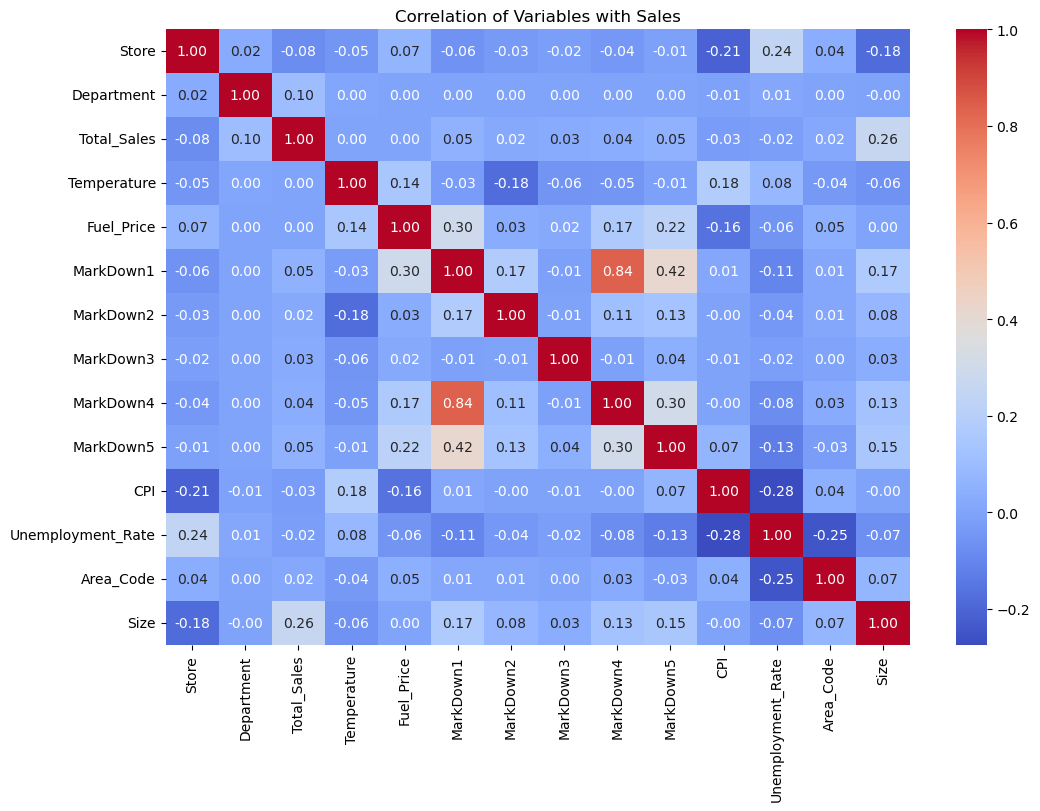

In [44]:
# Merge datasets on Store, Date (common keys)
df = sales_history.merge(business_data, on=["Store","Date","Holiday"], how="left")
df = df.merge(store_details, on="Store", how="left")

# Handle missing values (fill NA with 0 for MarkDowns)
for col in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Create new features
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Week'] = pd.to_datetime(df['Date']).dt.isocalendar().week

# Correlation analysis (numerical variables only)
num_cols = df.select_dtypes(include=['float64','int64']).columns
corr = df[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Variables with Sales")
plt.show()


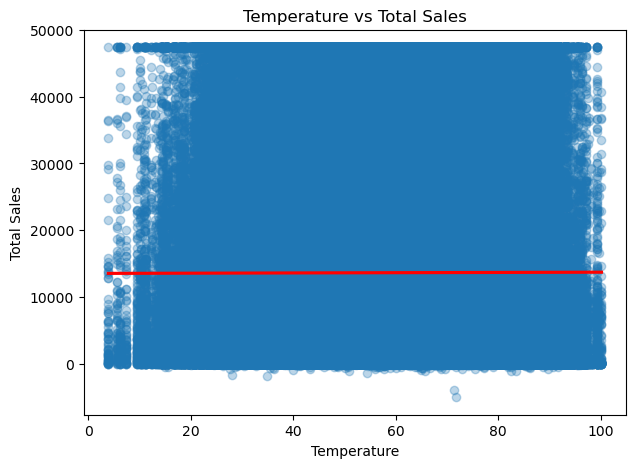

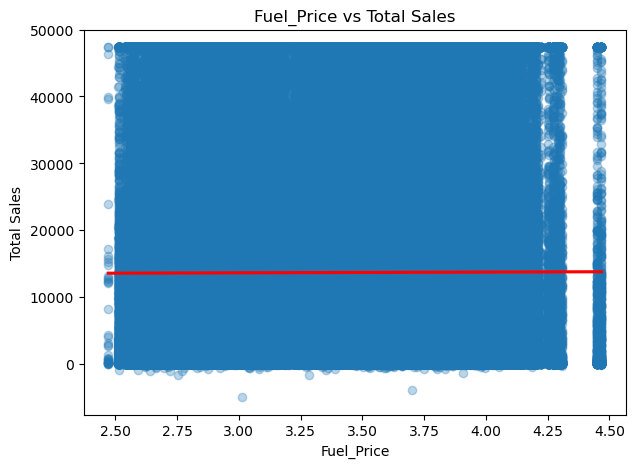

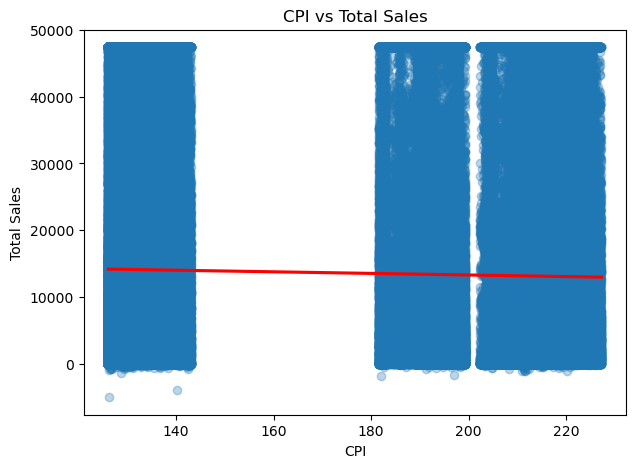

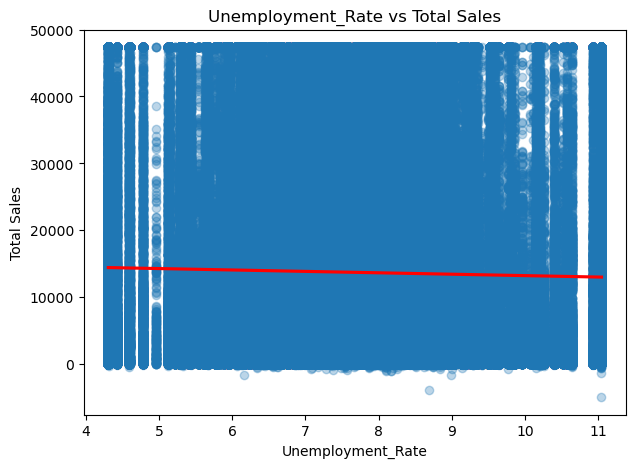

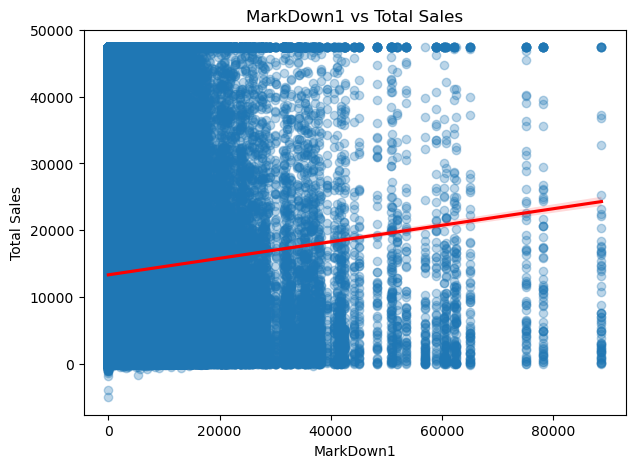

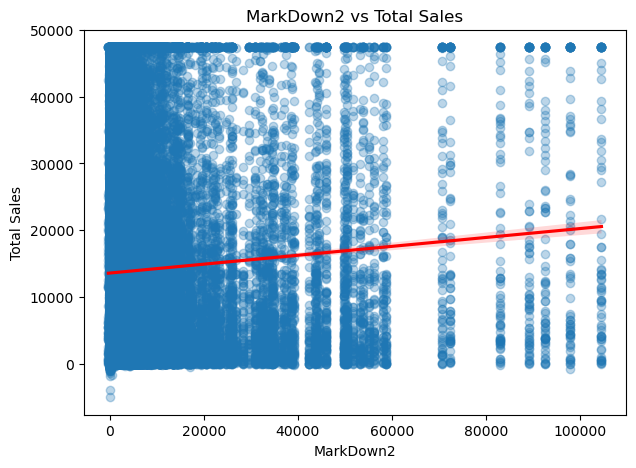

In [ ]:
# Scatter / regression plots for important variables vs Total_Sales
important_vars = ['Temperature','Fuel_Price','CPI','Unemployment_Rate',
                  'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Store_Size']

for col in important_vars:
    if col in df.columns:
        plt.figure(figsize=(7,5))
        sns.regplot(data=df, x=col, y="Total_Sales", scatter_kws={'alpha':0.3})
        plt.title(f"{col} vs Total_Sales")
        plt.show()

Develop and Validate Samples

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# ---------------------------
# 1. Load datasets
# ---------------------------
store_details = pd.read_excel(r"C:\Users\RAJDEEP_CHAKRABORTY\Desktop\XYZ\IVY\PYTHON\PYTHON SESSION\CAPSTONE PROJECT\Store_Details.xlsx")
business_data = pd.read_excel(r"C:\Users\RAJDEEP_CHAKRABORTY\Desktop\XYZ\IVY\PYTHON\PYTHON SESSION\CAPSTONE PROJECT\Business_Data.xlsx")
sales_history = pd.read_excel(r"C:\Users\RAJDEEP_CHAKRABORTY\Desktop\XYZ\IVY\PYTHON\PYTHON SESSION\CAPSTONE PROJECT\Sales_History.xlsx")


In [ ]:
# ---------------------------
# 2. Merge datasets
# ---------------------------
df = sales_history.merge(business_data, on=["Store", "Date", "Holiday"], how="left")
df = df.merge(store_details, on="Store", how="left")


In [ ]:
# ---------------------------
# 3. Feature engineering
# ---------------------------
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)

In [ ]:
# Drop columns not useful for modeling (example: Address, if anonymized)
df = df.drop(columns=["Address"], errors="ignore")


In [ ]:
# ---------------------------
# 4. Define features & target
# ---------------------------
target = "Total_Sales"
features = [col for col in df.columns if col not in ["Total_Sales", "Date"]]

X = df[features]
y = df[target]

In [ ]:
# Handle categorical variables (Store Type, Holiday, etc.)
X = pd.get_dummies(X, drop_first=True)


In [ ]:
# ---------------------------
# 5. Split into Development (70%) & Validation (30%)
# ---------------------------
X_dev, X_val, y_dev, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# ---------------------------
# 6. Model training (example: Linear Regression)
# ---------------------------
model = LinearRegression()
model.fit(X_dev, y_dev)

In [ ]:
# ---------------------------
# 7. Validation
# ---------------------------
y_pred = model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print("Validation RMSE:", rmse)
print("Validation R²:", r2)

Model Building

In [ ]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# ===============================
# 2. Load Datasets
# ===============================
store_details = pd.read_excel("Store_Details.xlsx")
business_data = pd.read_excel("Business_Data.xlsx")
sales_history = pd.read_excel("Sales_History.xlsx")

In [ ]:
# ===============================
# 3. Merge Datasets
# ===============================
# Merge sales with business data on Store + Date
df = pd.merge(sales_history, business_data, on=["Store", "Date", "Holiday"], how="left")

# Merge with store details on Store
df = pd.merge(df, store_details, on="Store", how="left")

In [ ]:
# ===============================
# 4. Feature Engineering
# ===============================
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extract year, month, week, dayofweek
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week
df["DayOfWeek"] = df["Date"].dt.dayofweek

In [ ]:
# Fill missing markdown values with 0
markdown_cols = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]
for col in markdown_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

In [ ]:
# ===============================
# 5. Define Features & Target
# ===============================
X = df.drop(columns=["Total_Sales","Date"])  # features
y = df["Total_Sales"]                          # target


In [ ]:
# Handle categorical features (like Store Type, Location) using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# ===============================
# 6. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
 ===============================
# 7. Model Building
# ===============================

# --- Linear Regression ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))


In [ ]:
# --- Random Forest Regression ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2:", r2_score(y_test, y_pred_rf)))

In [ ]:
# ===============================
# 8. Feature Importance (for RF)
# ===============================
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind="barh", figsize=(10,6))
plt.title("Top 15 Important Features")
plt.show()

 Improving model accuracy

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


In [ ]:
# Load datasets
store_details = pd.read_excel(r"C:\Users\RAJDEEP_CHAKRABORTY\Desktop\XYZ\IVY\PYTHON\PYTHON SESSION\CAPSTONE PROJECT\Store_Details.xlsx")
business_data = pd.read_excel(r"C:\Users\RAJDEEP_CHAKRABORTY\Desktop\XYZ\IVY\PYTHON\PYTHON SESSION\CAPSTONE PROJECT\Business_Data.xlsx")
sales_history = pd.read_excel(r"C:\Users\RAJDEEP_CHAKRABORTY\Desktop\XYZ\IVY\PYTHON\PYTHON SESSION\CAPSTONE PROJECT\Sales_History.xlsx")

In [ ]:
# Merge datasets
data = sales_history.merge(business_data, on=["Store", "Date", "Holiday"], how="left")
data = data.merge(store_details, on="Store", how="left")

In [ ]:
# Feature engineering
data["Year"] = pd.to_datetime(data["Date"]).dt.year
data["Month"] = pd.to_datetime(data["Date"]).dt.month
data["Week"] = pd.to_datetime(data["Date"]).dt.isocalendar().week


In [ ]:
# Define features & target
X = data.drop(columns=["Total_Sales", "Date"])
y = data["Total_Sales"]

In [ ]:
# Convert categorical to dummies
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# ------------------ Model 1: Random Forest ------------------
rf = RandomForestRegressor(random_state=42)
rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
rf_grid = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=3, scoring="r2", n_jobs=-1, random_state=42)
rf_grid.fit(X_train, y_train)

print("Best RF Params:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
print("Random Forest R2:", r2_score(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))

In [ ]:
# ------------------ Model 2: Gradient Boosting ------------------
gb = GradientBoostingRegressor(random_state=42)
gb_params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7]
}
gb_grid = GridSearchCV(gb, gb_params, cv=3, scoring="r2", n_jobs=-1)
gb_grid.fit(X_train, y_train)

print("Best GB Params:", gb_grid.best_params_)
gb_best = gb_grid.best_estimator_
gb_pred = gb_best.predict(X_test)
print("Gradient Boosting R2:", r2_score(y_test, gb_pred))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, gb_pred)))

In [ ]:
# ------------------ Model 3: XGBoost ------------------
xgb = XGBRegressor(random_state=42, objective="reg:squarederror")
xgb_params = {
    "n_estimators": [200, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 6, 10],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0]
}
xgb_grid = RandomizedSearchCV(xgb, xgb_params, n_iter=10, cv=3, scoring="r2", n_jobs=-1, random_state=42)
xgb_grid.fit(X_train, y_train)

print("Best XGB Params:", xgb_grid.best_params_)
xgb_best = xgb_grid.best_estimator_
xgb_pred = xgb_best.predict(X_test)
print("XGBoost R2:", r2_score(y_test, xgb_pred))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))

In [ ]:
# ------------------ Model Comparison ------------------
models = {
    "Random Forest": (r2_score(y_test, rf_pred), np.sqrt(mean_squared_error(y_test, rf_pred))),
    "Gradient Boosting": (r2_score(y_test, gb_pred), np.sqrt(mean_squared_error(y_test, gb_pred))),
    "XGBoost": (r2_score(y_test, xgb_pred), np.sqrt(mean_squared_error(y_test, xgb_pred)))
}

print("\nModel Performance Comparison (R2, RMSE):")
for model, scores in models.items():
    print(model, ":", scores)

Model Comparison

In [ ]:
# =======================
# Import Libraries
# =======================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
# =======================
# Load Datasets
# =======================
store_details = pd.read_excel(r"C:\Users\RAJDEEP_CHAKRABORTY\Desktop\XYZ\IVY\PYTHON\PYTHON SESSION\CAPSTONE PROJECT\Store_Details.xlsx")
business_data = pd.read_excel(r"C:\Users\RAJDEEP_CHAKRABORTY\Desktop\XYZ\IVY\PYTHON\PYTHON SESSION\CAPSTONE PROJECT\Business_Data.xlsx")
sales_history = pd.read_excel(r"C:\Users\RAJDEEP_CHAKRABORTY\Desktop\XYZ\IVY\PYTHON\PYTHON SESSION\CAPSTONE PROJECT\Sales_History.xlsx")

In [ ]:
# =======================
# Merge Datasets
# =======================
df = sales_history.merge(business_data, on=["Store", "Date", "Holiday"], how="left")
df = df.merge(store_details, on="Store", how="left")

In [ ]:
# =======================
# Feature Engineering
# =======================
# Extract time features
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)

In [ ]:
# Drop unnecessary columns
df = df.drop(["Date", "Address", "Location"], axis=1, errors="ignore")

# Handle missing values
df = df.fillna(0)


In [ ]:
# =======================
# Define X, y
# =======================
X = df.drop(["Total_Sales"], axis=1)
y = df["Total_Sales"]

# Scale features (important for regression models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# =======================
# Train-Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# =======================
# Model Comparison
# =======================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
    mean_cv_score = np.mean(cv_scores)
    
    # Fit & Evaluate on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    results[name] = {
        "CV_RMSE": -mean_cv_score,
        "Test_RMSE": test_rmse
    }


In [ ]:
# =======================
# Show Results
# =======================
results_df = pd.DataFrame(results).T.sort_values(by="Test_RMSE")
print(results_df)